In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
df_purchase = pd.read_csv("purchase_behaviour.csv")
df_transactions = pd.read_csv("transaction_data.csv")

In [3]:
# Display basic info
print(df_purchase.info())
print(df_transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(

In [4]:
# Preview first few rows
df_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
df = df_transactions.merge(df_purchase, on="LYLTY_CARD_NBR", how="left")

In [7]:
df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [9]:
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [18]:
df['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69691
Name: count, dtype: int64

In [21]:
df['LIFESTAGE'].value_counts()

LIFESTAGE
OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: count, dtype: int64

In [23]:
#Finding most important market segment

In [25]:
#To find the most profitable customers, we calculate total spending per customer
customer_revenue = df.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index()
most_profitable_customers = customer_revenue.sort_values(by="TOT_SALES", ascending=False)
print(most_profitable_customers.head(10))  # Top 10 highest-spending customers

       LYLTY_CARD_NBR  TOT_SALES
59694          226000    1300.00
60925          230078     138.60
17292           63197     132.80
69017          259009     127.20
42813          162039     126.80
16001           58361     124.80
61001          230154     124.40
25958           94185     122.80
35338          130090     122.65
47959          179228     120.80


In [27]:
#Now we will find about the Characteristics of Profitable Customers

In [29]:
profitable_segments = most_profitable_customers.merge(df_purchase, on="LYLTY_CARD_NBR", how="left")

segment_analysis = profitable_segments.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).size().reset_index(name="Count")
print(segment_analysis.sort_values(by="Count", ascending=False))

                 LIFESTAGE PREMIUM_CUSTOMER  Count
19   YOUNG SINGLES/COUPLES       Mainstream   8088
13                RETIREES       Mainstream   6479
10   OLDER SINGLES/COUPLES       Mainstream   4930
9    OLDER SINGLES/COUPLES           Budget   4929
11   OLDER SINGLES/COUPLES          Premium   4750
6           OLDER FAMILIES           Budget   4675
12                RETIREES           Budget   4454
15          YOUNG FAMILIES           Budget   4017
14                RETIREES          Premium   3872
18   YOUNG SINGLES/COUPLES           Budget   3779
1   MIDAGE SINGLES/COUPLES       Mainstream   3340
7           OLDER FAMILIES       Mainstream   2831
16          YOUNG FAMILIES       Mainstream   2728
20   YOUNG SINGLES/COUPLES          Premium   2574
17          YOUNG FAMILIES          Premium   2433
2   MIDAGE SINGLES/COUPLES          Premium   2431
8           OLDER FAMILIES          Premium   2274
0   MIDAGE SINGLES/COUPLES           Budget   1504
3             NEW FAMILIES     

In [31]:
#Interpretation
# Mainstream customers are having a larger count therefore are more important market segment
# As we can see and interpret older single/couples are of a great number therefore we can conclude that older peoples are a important market segment

In [33]:
#Identifying the bestselling products

In [35]:
#Top 3 Products by Total Sales Revenue

top_products_revenue = df_transactions.groupby("PROD_NAME")["TOT_SALES"].sum().sort_values(ascending=False).head(3)
print(top_products_revenue)

PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64


In [37]:
#Top 3 Products by Quantity Sold

top_products_quantity = df_transactions.groupby("PROD_NAME")["PROD_QTY"].sum().sort_values(ascending=False).head(3)
print(top_products_quantity)

PROD_NAME
Dorito Corn Chp     Supreme 380g            6509
Kettle Mozzarella   Basil & Pesto 175g      6381
Kettle Tortilla ChpsHny&Jlpno Chili 150g    6309
Name: PROD_QTY, dtype: int64


In [39]:
# Bestselling products
# -> By Total Sales Revenue:
# 1. Dorito Corn Chp     Supreme 380g            
# 2. Smiths Crnkle Chip  Orgnl Big Bag 380g      
# 3. Smiths Crinkle Chips Salt & Vinegar 330g

# -> By Total Quantity Sold:
# 1. Dorito Corn Chp     Supreme 380g            
# 2. Kettle Mozzarella   Basil & Pesto 175g      
# 3. Kettle Tortilla ChpsHny&Jlpno Chili 150g

In [41]:
#Notes
#Can also find out about customer lifestyle & spending patterns from purchase_behaviour.csv for these products

In [43]:
# Top 3 most profitable products
top_products = df.groupby("PROD_NAME")["TOT_SALES"].sum().reset_index()
top_products = top_products.sort_values(by="TOT_SALES", ascending=False)
top_3_products = top_products.head(3)
print(top_3_products)

                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


In [45]:
# To identify Most Loyal Customers

In [47]:
# I am defining loyalty by purchase frequency

loyal_customers = df["LYLTY_CARD_NBR"].value_counts().head(10)  # Top 10 loyal customers
print(loyal_customers)

LYLTY_CARD_NBR
172032    18
162039    18
230078    17
128178    17
13138     17
116181    17
222242    16
94185     16
113080    16
109036    16
Name: count, dtype: int64


In [49]:
# Filter the transactions for the top 10 loyal customers
loyal_customer_transactions = df[df["LYLTY_CARD_NBR"].isin(loyal_customers.index)]

In [51]:
# Count product purchases among loyal customers
loyal_product_preferences = loyal_customer_transactions["PROD_NAME"].value_counts().head(10)

print(loyal_product_preferences)

PROD_NAME
Smiths Crinkle Cut  Chips Chs&Onion170g    7
Infzns Crn Crnchers Tangy Gcamole 110g     5
RRD Pc Sea Salt     165g                   5
Twisties Cheese     Burger 250g            5
Doritos Corn Chip Mexican Jalapeno 150g    5
Woolworths Medium   Salsa 300g             4
Tostitos Smoked     Chipotle 175g          4
Natural Chip        Compny SeaSalt175g     4
Cheetos Chs & Bacon Balls 190g             4
Thins Chips Seasonedchicken 175g           3
Name: count, dtype: int64


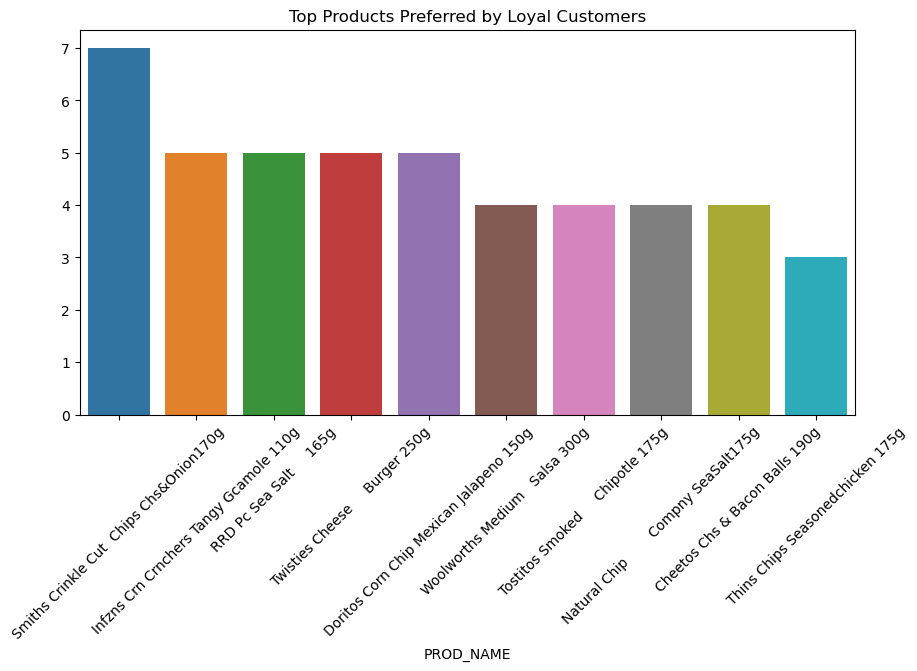

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(x=loyal_product_preferences.index, y=loyal_product_preferences.values)
plt.title("Top Products Preferred by Loyal Customers")
plt.xticks(rotation=45)
plt.show()

In [55]:
# This suggests that loyal customers are heavy snack buyers rather than grocery or household item shoppers.
# Popular brands include Smiths, Doritos, Twisties, and Cheetos, indicating that these brands may have strong customer retention.

In [57]:
# Hypothesis – Why These Customers Prefer These Products?
# -> Frequent Snackers or Family Buyers
# -> Brand Loyalty to Smiths, Doritos, and Twisties


# Possible Marketing Strategy
# -> Bundle the most frequently purchased snacks together as a “Loyalty Snack Pack”.
# -> Offer exclusive discounts or loyalty rewards on these specific brands.
# -> Personalized promotions for repeat snack buyers, such as “Buy 3, Get 1 Free” offers.